### 워드 클라우드 - 어버이날 선물

In [58]:
import re, nltk
import numpy as np
from konlpy.tag import Okt
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

- 한글 text 전처리

In [37]:
with open('data/어버이날 선물.txt') as f:
    text = f.read()

In [38]:
okt = Okt()
tokens = okt.nouns(text)    #문장에서 명사 추출
tokens[:10]

['부모님', '어깨', '무릎', '저희', '부모님', '사용', '매번', '칭찬', '제품', '답글']

In [39]:
# 영문자, 숫자 제거
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]','',token)
    if item:            # 빈 문자열이면 False, 즉, 빈 문자열이 아닌 것만 append
        new_tokens.append(item)

- 불용어 정리

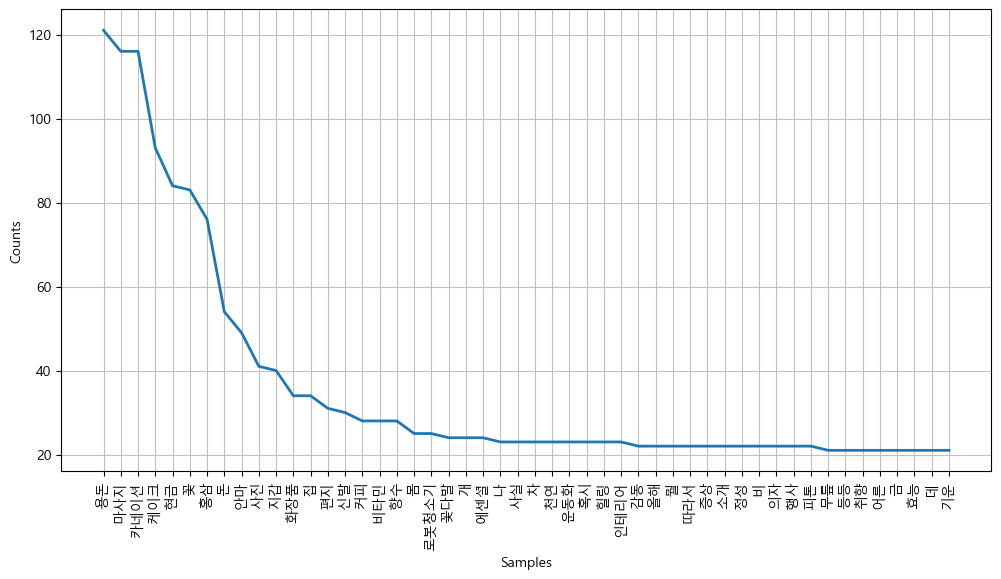

In [52]:
gift = nltk.Text(new_tokens, name='어버이날선물')
plt.figure(figsize=(12,6))
gift.plot(50);

In [51]:
stoptext = """
    선물 추천 어버이날 부모님 것 수 건강 제품 제 이 저 식품 가격 도움 요 참고 사용 스 활동 때
    파트너 고민 수수료 위 구매 등 생각 분 요즘 제공 상품 기 박스 마음 정액 한번 이미지 존재 링크
    아래 정말 거 더 일환 선택 향 기능 지금 부담 관리 가지 쿠팡 하나 포스팅 답변 양제 가장 주문
    준비 방향 인기 브랜드 날 디자인 건 정보 의미 저희 채택 이번 질문 관절 이친 시간 배송 일 오일 나이 정도
    아버지 어머니 꼭 엄마 카드 걸 운동 때문 제작 좀 자 발 사 도 직접 석고 보시 노블 호랑이 후기 평소
    제일 번 포장 할인 관련 다른 효과 전 아빠 중 보충 바로 통해 드릴 세트 콘드 해 조금 최고 연골 우리
    고려 글 라면 피 안 종류 성분 구성 아버님 경우 플라워 봍우 그 용 판매 단백질 매일 검색 용품
    더욱 어머님 구 작년 생신 봉투 조절 여러 프리미엄 가성 섭취 단 침향 기념 골프 다음 통증 가요 확인 달 이벤트
    사람 그냥 당뇨 여기 어르신 무엇 비누 카페 실용
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['어깨', '무릎', '매번', '칭찬', '답글', '원적외선', '치료', '일반', '적외선', '사기']

In [53]:
data = gift.vocab().most_common(5)
data

[('용돈', 121), ('마사지', 116), ('카네이션', 116), ('케이크', 93), ('현금', 84)]

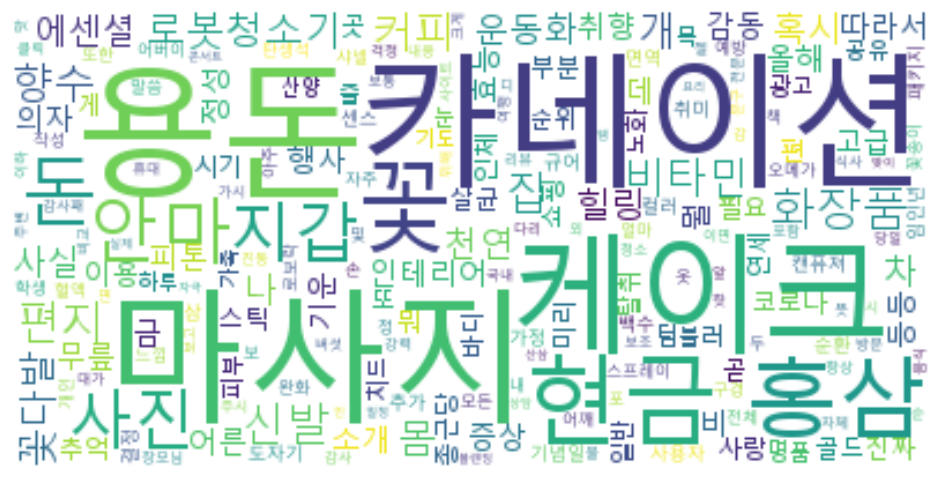

In [55]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf'
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

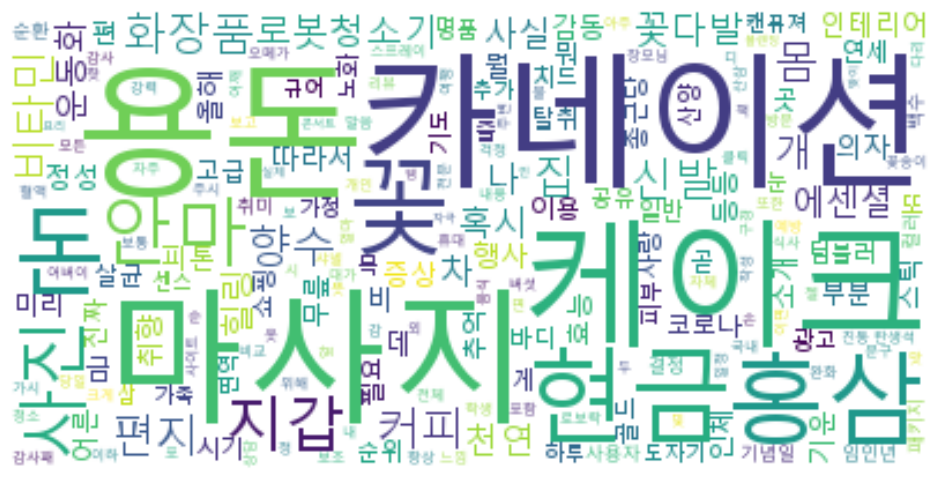

In [57]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf', relative_scaling=0.2
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

- 그림 위에 표시

In [60]:
mask = np.array(Image.open('data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

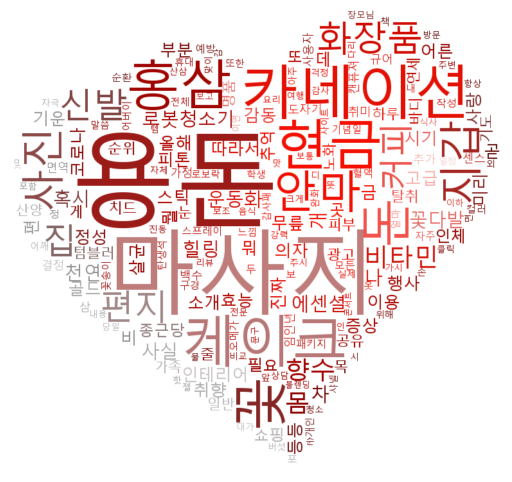

In [61]:
wc = WordCloud(
    background_color='white', random_state=2023,
    font_path='c:/Windows/Fonts/malgun.ttf', 
    relative_scaling=0.2, mask=mask
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(12,6))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off');